# Chicago Crime Analysis and Prediction Part II: Prediction

In [0]:
#Mount my drive- run the code, go to the link, accept.
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
#Change working directory to make it easier to access the files
import os
os.chdir("/content/gdrive/My Drive/OwnJupyterNotebooks/")
os.getcwd()

'/content/gdrive/My Drive/OwnJupyterNotebooks'

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
datato2017 = pd.read_csv("/content/gdrive/My Drive/OwnJupyterNotebooks/Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)
datato2017.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [0]:
rel_data = datato2017[['ID','Case Number','Date','Block','IUCR','Primary Type','Description','Location Description',
                       'Arrest','Ward','Community Area','FBI Code','Year','Updated On']]
rel_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Ward,Community Area,FBI Code,Year,Updated On
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,24.0,29.0,08B,2016,05/10/2016 03:56:50 PM
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,20.0,42.0,08B,2016,05/10/2016 03:56:50 PM
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,37.0,25.0,24,2016,05/10/2016 03:56:50 PM
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,28.0,25.0,08B,2016,05/10/2016 03:56:50 PM
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,28.0,25.0,06,2016,05/10/2016 03:56:50 PM


In [0]:
rel_data.shape

(1456714, 14)

In [0]:
# Reduce size of dataset for processing
rel_data = rel_data[1450000:]
rel_data.shape

(6714, 14)

In [0]:
rel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 1450000 to 1456713
Data columns (total 14 columns):
ID                      6714 non-null int64
Case Number             6714 non-null object
Date                    6714 non-null object
Block                   6714 non-null object
IUCR                    6714 non-null object
Primary Type            6714 non-null object
Description             6714 non-null object
Location Description    6684 non-null object
Arrest                  6714 non-null bool
Ward                    6714 non-null float64
Community Area          6714 non-null float64
FBI Code                6714 non-null object
Year                    6714 non-null int64
Updated On              6714 non-null object
dtypes: bool(1), float64(2), int64(2), object(9)
memory usage: 688.5+ KB


### Predicting Where the Crime Will Occur Next

In [0]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix 
from sklearn.model_selection import train_test_split

In [0]:
rel_data.shape

(6714, 14)

Note drastic reduction in data points to run on 12GB of ram.

### Make heatmap to see which features are most correlated

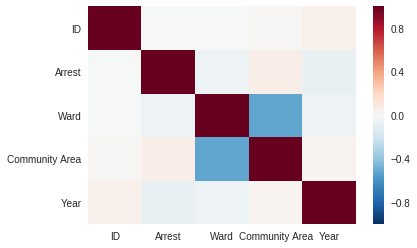

In [0]:
correlation = rel_data.corr()
sns.heatmap(correlation)

This isn't giving the desired information.  I was hoping for more information on features that might influence which community area will experience crime, since that is the output variable for the predictive model.

### The Get Dummies Method

In [0]:
rel_dummies = pd.get_dummies(rel_data[['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'FBI Code', 'Updated On']])
rel_dummies.head()

,Case Number_HX125483,Case Number_HX250586,Case Number_HX255324,Case Number_HX287488,Case Number_HX301261,Case Number_HX314624,Case Number_HY112577,Case Number_HY126195,Case Number_HY189254,Case Number_HY217048,...,Updated On_01/21/2017 03:48:36 PM,Updated On_01/22/2017 03:46:03 PM,Updated On_01/22/2017 03:47:43 PM,Updated On_01/23/2017 03:49:47 PM,Updated On_01/23/2017 03:52:03 PM,Updated On_01/24/2017 03:52:49 PM,Updated On_01/24/2017 03:55:11 PM,Updated On_01/25/2017 03:52:18 PM,Updated On_01/25/2017 03:54:12 PM,Updated On_05/10/2016 03:56:50 PM
1450000,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
rel_data = rel_data.drop(['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'FBI Code', 'Updated On'],axis=1)
rel_data.head()

,ID,Arrest,Ward,Community Area,Year
1450000,10812982,False,38.0,15.0,2017
1450001,10812983,False,14.0,57.0,2017
1450002,10812986,False,23.0,57.0,2017
1450003,10813012,False,42.0,8.0,2017
1450004,10813013,False,2.0,33.0,2017


In [0]:
rel = pd.concat([rel_data, rel_dummies], axis=1)
rel.head()

,ID,Arrest,Ward,Community Area,Year,Case Number_HX125483,Case Number_HX250586,Case Number_HX255324,Case Number_HX287488,Case Number_HX301261,...,Updated On_01/21/2017 03:48:36 PM,Updated On_01/22/2017 03:46:03 PM,Updated On_01/22/2017 03:47:43 PM,Updated On_01/23/2017 03:49:47 PM,Updated On_01/23/2017 03:52:03 PM,Updated On_01/24/2017 03:52:49 PM,Updated On_01/24/2017 03:55:11 PM,Updated On_01/25/2017 03:52:18 PM,Updated On_01/25/2017 03:54:12 PM,Updated On_05/10/2016 03:56:50 PM
1450000,10812982,False,38.0,15.0,2017,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450001,10812983,False,14.0,57.0,2017,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450002,10812986,False,23.0,57.0,2017,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450003,10813012,False,42.0,8.0,2017,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450004,10813013,False,2.0,33.0,2017,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X = rel.loc[:, rel.columns != 'Community Area']
y = rel_data['Community Area']

In [0]:
# Divide X, y into train and test data, input and output variables 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [0]:
rel['Community Area'].value_counts().head()

25.0    424
8.0     268
28.0    261
29.0    247
24.0    229
Name: Community Area, dtype: int64

There are 77 community areas.

In [0]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 77).fit(X_train, y_train)

In [0]:
# Accuracy on X_test 
accuracy_score = knn.score(X_test, y_test) 
print(accuracy_score)

0.051816557474687316


##This is not a very accurate model
#### Let's read the data again and try again in a new notebook.

In [3]:
datato2017 = pd.read_csv("/content/gdrive/My Drive/OwnJupyterNotebooks/Chicago_Crimes_2012_to_2017.csv", error_bad_lines=False)
datato2017.head()

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,3,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,24.0,29.0,08B,1154907.0,1893681.0,2016,05/10/2016 03:56:50 PM,41.864073,-87.706819,"(41.864073157, -87.706818608)"
1,89,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,...,20.0,42.0,08B,1183066.0,1864330.0,2016,05/10/2016 03:56:50 PM,41.782922,-87.604363,"(41.782921527, -87.60436317)"
2,197,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,...,37.0,25.0,24,1140789.0,1904819.0,2016,05/10/2016 03:56:50 PM,41.894908,-87.758372,"(41.894908283, -87.758371958)"
3,673,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,...,28.0,25.0,08B,1143223.0,1901475.0,2016,05/10/2016 03:56:50 PM,41.885687,-87.749516,"(41.885686845, -87.749515983)"
4,911,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,...,28.0,25.0,06,1139890.0,1901675.0,2016,05/10/2016 03:56:50 PM,41.886297,-87.761751,"(41.886297242, -87.761750709)"


In [4]:
rel_data2 = datato2017[['ID','Case Number','Date','Block','IUCR','Primary Type','Description','Location Description',
                       'Arrest','Ward','Community Area','FBI Code','Year','Updated On']]
rel_data2.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Ward,Community Area,FBI Code,Year,Updated On
0,10508693,HZ250496,05/03/2016 11:40:00 PM,013XX S SAWYER AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,24.0,29.0,08B,2016,05/10/2016 03:56:50 PM
1,10508695,HZ250409,05/03/2016 09:40:00 PM,061XX S DREXEL AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,20.0,42.0,08B,2016,05/10/2016 03:56:50 PM
2,10508697,HZ250503,05/03/2016 11:31:00 PM,053XX W CHICAGO AVE,0470,PUBLIC PEACE VIOLATION,RECKLESS CONDUCT,STREET,False,37.0,25.0,24,2016,05/10/2016 03:56:50 PM
3,10508698,HZ250424,05/03/2016 10:10:00 PM,049XX W FULTON ST,0460,BATTERY,SIMPLE,SIDEWALK,False,28.0,25.0,08B,2016,05/10/2016 03:56:50 PM
4,10508699,HZ250455,05/03/2016 10:00:00 PM,003XX N LOTUS AVE,0820,THEFT,$500 AND UNDER,RESIDENCE,False,28.0,25.0,06,2016,05/10/2016 03:56:50 PM


In [5]:
# Reduce size of dataset for processing
rel_data2 = rel_data2[1450000:]
rel_data2.shape

(6714, 14)

In [6]:
rel3 = rel_data2[['Date','Block','Primary Type','Description','Location Description',
                       'Arrest','Ward','Community Area','FBI Code','Year']]
rel3.head()

,Date,Block,Primary Type,Description,Location Description,Arrest,Ward,Community Area,FBI Code,Year
1450000,01/09/2017 08:00:00 PM,047XX W PATTERSON AVE,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,38.0,15.0,08B,2017
1450001,01/09/2017 06:30:00 PM,047XX S KARLOV AVE,ASSAULT,SIMPLE,RESIDENCE,False,14.0,57.0,08A,2017
1450002,01/09/2017 04:00:00 AM,048XX S TRIPP AVE,BATTERY,DOMESTIC BATTERY SIMPLE,RESIDENCE,False,23.0,57.0,08B,2017
1450003,01/09/2017 06:15:00 PM,004XX N CITY FRONT PLAZA DR,THEFT,FROM BUILDING,COLLEGE/UNIVERSITY GROUNDS,False,42.0,8.0,06,2017
1450004,01/09/2017 12:20:00 PM,017XX S PRAIRIE AVE,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,2.0,33.0,11,2017


In [7]:
rel3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 1450000 to 1456713
Data columns (total 10 columns):
Date                    6714 non-null object
Block                   6714 non-null object
Primary Type            6714 non-null object
Description             6714 non-null object
Location Description    6684 non-null object
Arrest                  6714 non-null bool
Ward                    6714 non-null float64
Community Area          6714 non-null float64
FBI Code                6714 non-null object
Year                    6714 non-null int64
dtypes: bool(1), float64(2), int64(1), object(6)
memory usage: 478.7+ KB


In [8]:
#Arrest, Ward, Community Area, Year are not objects
#Check value counts of Year to see if okay to drop

rel3['Year'].value_counts()

2017    6041
2016     617
2015      33
2014      18
2012       3
2013       2
Name: Year, dtype: int64

In [9]:
rel3_dummies = pd.get_dummies(rel3[['Date','Block','Primary Type','Description','Location Description',
                       'Arrest','Ward','FBI Code','Year']])
rel3_dummies.head()

,Arrest,Ward,Year,Date_01/01/2014 12:00:00 AM,Date_01/01/2014 12:01:00 AM,Date_01/01/2015 08:00:00 AM,Date_01/01/2016 08:00:00 AM,Date_01/01/2016 12:01:00 AM,Date_01/01/2017 01:00:00 AM,Date_01/01/2017 02:30:00 PM,...,FBI Code_13,FBI Code_14,FBI Code_15,FBI Code_16,FBI Code_17,FBI Code_18,FBI Code_20,FBI Code_22,FBI Code_24,FBI Code_26
1450000,False,38.0,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450001,False,14.0,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450002,False,23.0,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450003,False,42.0,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450004,False,2.0,2017,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [10]:
rel3 = rel3.drop(['Date','Block','Primary Type','Description','Location Description',
                       'Arrest','Ward','FBI Code','Year'],axis=1)
rel3.head()

,Community Area
1450000,15.0
1450001,57.0
1450002,57.0
1450003,8.0
1450004,33.0


In [11]:
rel_second = pd.concat([rel3, rel3_dummies], axis=1)
rel_second.head()

,Community Area,Arrest,Ward,Year,Date_01/01/2014 12:00:00 AM,Date_01/01/2014 12:01:00 AM,Date_01/01/2015 08:00:00 AM,Date_01/01/2016 08:00:00 AM,Date_01/01/2016 12:01:00 AM,Date_01/01/2017 01:00:00 AM,...,FBI Code_13,FBI Code_14,FBI Code_15,FBI Code_16,FBI Code_17,FBI Code_18,FBI Code_20,FBI Code_22,FBI Code_24,FBI Code_26
1450000,15.0,False,38.0,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450001,57.0,False,14.0,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450002,57.0,False,23.0,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450003,8.0,False,42.0,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1450004,33.0,False,2.0,2017,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [0]:
X = rel_second.loc[:, rel_second.columns != 'Community Area']
y = rel_second['Community Area']

In [0]:
# Divide X, y into train and test data, input and output variables 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [0]:
from sklearn.neighbors import KNeighborsClassifier 
knn = KNeighborsClassifier(n_neighbors = 77).fit(X_train, y_train)

In [17]:
# Accuracy on X_test 
accuracy_score = knn.score(X_test, y_test) 
print(accuracy_score)

0.406789755807028


#### Removing more 'irrelvant' features made the accuracy score worse.

## First attempt below:

#### I am not finding information on how to pass fully transformed categorical data back into the original dataframe.  I'm leaving this in the notebook as evidence of the "trial and error" nature of model building for anyone who happens to come across it.

### Get information on data

In [0]:
rel_data = rel_data.fillna('')

In [0]:
rel_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6714 entries, 1450000 to 1456713
Data columns (total 14 columns):
ID                      6714 non-null int64
Case Number             6714 non-null int64
Date                    6714 non-null int64
Block                   6714 non-null int64
IUCR                    6714 non-null int64
Primary Type            6714 non-null int64
Description             6714 non-null int64
Location Description    6714 non-null int64
Arrest                  6714 non-null bool
Ward                    6714 non-null float64
Community Area          6714 non-null int64
FBI Code                6714 non-null int64
Year                    6714 non-null int64
Updated On              6714 non-null int64
dtypes: bool(1), float64(1), int64(12)
memory usage: 688.5 KB


In [0]:
rel_data.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                     object
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Ward                    float64
Community Area          float64
FBI Code                 object
Year                      int64
Updated On               object
dtype: object

### Apply SKLearn LabelEncoder

In [0]:
# First transform with LabelEncoder, followed by OneHotEncoder
transform = rel_data[['Case Number','Date','Block','IUCR','Primary Type','Description','Location Description','FBI Code','Updated On']]

In [0]:
#https://towardsdatascience.com/encoding-categorical-features-21a2651a065c
# Categorical boolean mask
categorical_feature_bool = transform.dtypes==object
# filter categorical columns using mask and turn it into a list
categorical_columns = transform.columns[categorical_feature_bool].tolist()

In [0]:
# Import LabelEncoder
from sklearn.preprocessing import LabelEncoder
# Create LabelEncoder object
LE_data = LabelEncoder()

In [0]:
# apply LE_data on categorical feature columns
# X[categorical_columns] = X[categorical_columns].apply(lambda col: LE_data.fit_transform(col))
# X[categorical_columns].head(10)
transform = transform.apply(lambda col: LE_data.fit_transform(col))
transform.head(10)

,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,FBI Code,Updated On
1450000,1237,156,3050,32,2,69,15,9,0
1450001,1087,153,3025,49,1,158,67,8,0
1450002,1132,139,3087,32,2,69,67,9,0
1450003,1134,152,430,64,25,85,32,6,0
1450004,1053,181,1467,83,8,78,0,12,0
1450005,1138,134,1778,97,6,173,69,15,0
1450006,1127,159,1978,53,3,80,69,5,0
1450007,1223,126,4210,57,25,126,79,6,0
1450008,1316,150,776,53,3,80,15,5,0
1450009,1318,154,2587,167,18,165,15,23,0


#### Insert transformed data back into main dataframe

In [0]:
rel_data['Case Number']= transform['Case Number']
rel_data['Date']= transform['Date']
rel_data['Block']= transform['Block']
rel_data['IUCR']= transform['IUCR']
rel_data['Primary Type']= transform['Primary Type']
rel_data['Description']= transform['Description']
rel_data['Location Description']= transform['Location Description']
rel_data['FBI Code']= transform['FBI Code']
rel_data['Updated On']= transform['Updated On']

In [0]:
rel_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Ward,Community Area,FBI Code,Year,Updated On
1450000,10812982,1237,156,3050,32,2,69,15,False,38.0,15.0,9,2017,0
1450001,10812983,1087,153,3025,49,1,158,67,False,14.0,57.0,8,2017,0
1450002,10812986,1132,139,3087,32,2,69,67,False,23.0,57.0,9,2017,0
1450003,10813012,1134,152,430,64,25,85,32,False,42.0,8.0,6,2017,0
1450004,10813013,1053,181,1467,83,8,78,0,False,2.0,33.0,12,2017,0


#### Transform the output variable

In [0]:

transform_y = rel_data['Community Area']
transform_y = transform.apply(lambda col: LE_data.fit_transform(col))

In [0]:
rel_data['Community Area']=transform_y

In [0]:
rel_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Ward,Community Area,FBI Code,Year,Updated On
1450000,10812982,1237,156,3050,32,2,69,15,False,38.0,1237,9,2017,0
1450001,10812983,1087,153,3025,49,1,158,67,False,14.0,1087,8,2017,0
1450002,10812986,1132,139,3087,32,2,69,67,False,23.0,1132,9,2017,0
1450003,10813012,1134,152,430,64,25,85,32,False,42.0,1134,6,2017,0
1450004,10813013,1053,181,1467,83,8,78,0,False,2.0,1053,12,2017,0


In [0]:
OHE = preprocessing.OneHotEncoder(sparse=True)
OHE.fit(transform)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


OneHotEncoder(categorical_features=None, categories=None,
       dtype=<class 'numpy.float64'>, handle_unknown='error',
       n_values=None, sparse=True)

In [0]:
ohe_transform = OHE.transform(transform).toarray()
ohe_transform.shape

(6714, 15768)

In [0]:
transform.columns

Index(['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'FBI Code', 'Updated On'],
      dtype='object')

In [0]:
# newdf=pd.DataFrame(df_array, columns=['A','B','C'])

#new_ohe_transform = pd.DataFrame(ohe_transform, columns=['Case Number', 'Date', 'Block', 'IUCR', 'Primary Type', 'Description',
       #'Location Description', 'FBI Code', 'Updated On'])
#new_ohe.head()
  

In [0]:
# Access original data again
data = datato2017[['ID','Case Number','Date','Block','IUCR','Primary Type','Description','Location Description',
                       'Arrest','Ward','Community Area','FBI Code','Year','Updated On']]

In [0]:
# Separate out the input variables and the output variables, labels
# X is the set of classification predictor characteristics, y is the target label
X = rel_data[['Date','Block','IUCR','Primary Type','Description','Location Description','Arrest','Ward','FBI Code','Year']]
y = rel_data['Community Area']

In [0]:
# Divide X, y into train and test data, input and output variables 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [0]:
# Divide X, y into train and test data, input and output variables 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)